# Brazil COVID-19 Hospital Dataset



Background

The World Health Organization (WHO) characterized the COVID-19, caused by the SARS-CoV-2, as a pandemic on March 11, while the exponential increase in the number of cases was risking to overwhelm health systems around the world with a demand for ICU beds far above the existing capacity, with regions of Italy being prominent examples.

Brazil recorded the first case of SARS-CoV-2 on February 26, and the virus transmission evolved from imported cases only, to local and finally community transmission very rapidly, with the federal government declaring nationwide community transmission on March 20.

Until March 27, the state of São Paulo had recorded 1,223 confirmed cases of COVID-19, with 68 related deaths, while the county of São Paulo, with a population of approximately 12 million people and where Hospital Israelita Albert Einstein is located, had 477 confirmed cases and 30 associated death, as of March 23. Both the state and the county of São Paulo decided to establish quarantine and social distancing measures, that will be enforced at least until early April, in an effort to slow the virus spread.

One of the motivations for this challenge is the fact that in the context of an overwhelmed health system with the possible limitation to perform tests for the detection of SARS-CoV-2, testing every case would be impractical and tests results could be delayed even if only a target subpopulation would be tested.

Dataset

This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.

Task Details

TASK 1
• Predict confirmed COVID-19 cases among suspected cases.
Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

TASK 2
• Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases.
Based on the results of laboratory tests commonly collected among confirmed COVID-19 cases during a visit to the emergency room, would it be possible to predict which patients will need to be admitted to a general ward, semi-intensive unit or intensive care unit?

Expected Submission

Submit a notebook that implements the full lifecycle of data preparation, model creation and evaluation. Feel free to use this dataset plus any other data you have available. Since this is not a formal competition, you're not submitting a single submission file, but rather your whole approach to building a model.



https://github.com/dsrscientist/COVID_19_Datasets/blob/master/covid19_clinical_dataset.xlsx

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#pandas
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

In [2]:
df = pd.read_excel('covid19_clinical_dataset.xlsx')

In [3]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [5]:
#Check info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [6]:
#Check null value
df.isnull().sum()
 

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

In [7]:
#Check null value in percentage 
df_null_pct = df.isna().mean().round(4) * 100
df_null_pct.sort_values()

Patient ID                                                 0.00
Patient age quantile                                       0.00
SARS-Cov-2 exam result                                     0.00
Patient addmited to regular ward (1=yes, 0=no)             0.00
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.00
Patient addmited to intensive care unit (1=yes, 0=no)      0.00
Influenza B                                               76.01
Respiratory Syncytial Virus                               76.01
Influenza A                                               76.01
Rhinovirus/Enterovirus                                    76.05
Inf A H1N1 2009                                           76.05
CoronavirusOC43                                           76.05
Coronavirus229E                                           76.05
Parainfluenza 4                                           76.05
Adenovirus                                                76.05
Chlamydophila pneumoniae                

In [8]:
#remove null value which more then 90%
nulls = df_null_pct[df_null_pct > 90]
df = df[[col for col in df.columns if col not in nulls]]
df.head(25)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2a2245e360808d7,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,509197ec73f1400,16,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
9,5f1ed301375586c,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


In [9]:
df.shape

(5644, 39)

In [10]:
# understand data
df.describe(include="all").transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient ID,5644,5644,d9ce588c34a1431,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient age quantile,5644,NaN,NaN,NaN,9.31839,5.7779,0,4,9,14,19
SARS-Cov-2 exam result,5644,2,negative,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Patient addmited to regular ward (1=yes, 0=no)",5644,NaN,NaN,NaN,0.0139972,0.117489,0,0,0,0,1
"Patient addmited to semi-intensive unit (1=yes, 0=no)",5644,NaN,NaN,NaN,0.00885897,0.0937125,0,0,0,0,1
"Patient addmited to intensive care unit (1=yes, 0=no)",5644,NaN,NaN,NaN,0.00726435,0.0849286,0,0,0,0,1
Hematocrit,603,NaN,NaN,NaN,-2.18621e-09,1.00083,-4.50142,-0.518807,0.053407,0.717175,2.6627
Hemoglobin,603,NaN,NaN,NaN,-1.60132e-08,1.00083,-4.3456,-0.586244,0.040316,0.729532,2.67187
Platelets,602,NaN,NaN,NaN,-3.535e-10,1.00083,-2.55243,-0.605346,-0.121716,0.531498,9.53203
Mean platelet volume,599,NaN,NaN,NaN,7.43814e-09,1.00084,-2.45757,-0.662483,-0.101517,0.683835,3.71305


In [11]:
#check data types
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [12]:
#check datatypes in orders
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Patient age quantile',
        'Patient addmited to regular ward (1=yes, 0=no)',
        'Patient addmited to semi-intensive unit (1=yes, 0=no)',
        'Patient addmited to intensive care unit (1=yes, 0=no)'],
       dtype='object'),
 dtype('float64'): Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
        'Red blood Cells', 'Lymphocytes',
        'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
        'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
        'Mean corpuscular volume (MCV)', 'Monocytes',
        'Red blood cell distribution width (RDW)'],
       dtype='object'),
 dtype('O'): Index(['Patient ID', 'SARS-Cov-2 exam result', 'Respiratory Syncytial Virus',
        'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
        'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
        'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
        'Coronaviru

In [13]:
#create a list of columns with datatype == 'object'
x1=[]
for c in df.columns:
    x=df[c].dtype
    if x == 'object' and c != 'Patient ID':
        x1.append(c)
print(x1)

['SARS-Cov-2 exam result', 'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2', 'Influenza B, rapid test', 'Influenza A, rapid test']


In [14]:
#check unique values on list
for a in x1:
    print(a,'\t',df[a].unique(),'\n')

SARS-Cov-2 exam result 	 ['negative' 'positive'] 

Respiratory Syncytial Virus 	 [nan 'not_detected' 'detected'] 

Influenza A 	 [nan 'not_detected' 'detected'] 

Influenza B 	 [nan 'not_detected' 'detected'] 

Parainfluenza 1 	 [nan 'not_detected' 'detected'] 

CoronavirusNL63 	 [nan 'not_detected' 'detected'] 

Rhinovirus/Enterovirus 	 [nan 'detected' 'not_detected'] 

Coronavirus HKU1 	 [nan 'not_detected' 'detected'] 

Parainfluenza 3 	 [nan 'not_detected' 'detected'] 

Chlamydophila pneumoniae 	 [nan 'not_detected' 'detected'] 

Adenovirus 	 [nan 'not_detected' 'detected'] 

Parainfluenza 4 	 [nan 'not_detected' 'detected'] 

Coronavirus229E 	 [nan 'not_detected' 'detected'] 

CoronavirusOC43 	 [nan 'not_detected' 'detected'] 

Inf A H1N1 2009 	 [nan 'not_detected' 'detected'] 

Bordetella pertussis 	 [nan 'not_detected' 'detected'] 

Metapneumovirus 	 [nan 'not_detected' 'detected'] 

Parainfluenza 2 	 [nan 'not_detected'] 

Influenza B, rapid test 	 [nan 'negative' 'positive'] 


In [15]:
#replace some datas
df=df.replace(['positive','negative','not_detected','detected'],
                  [1,0,0,1])
df= df.fillna(0)

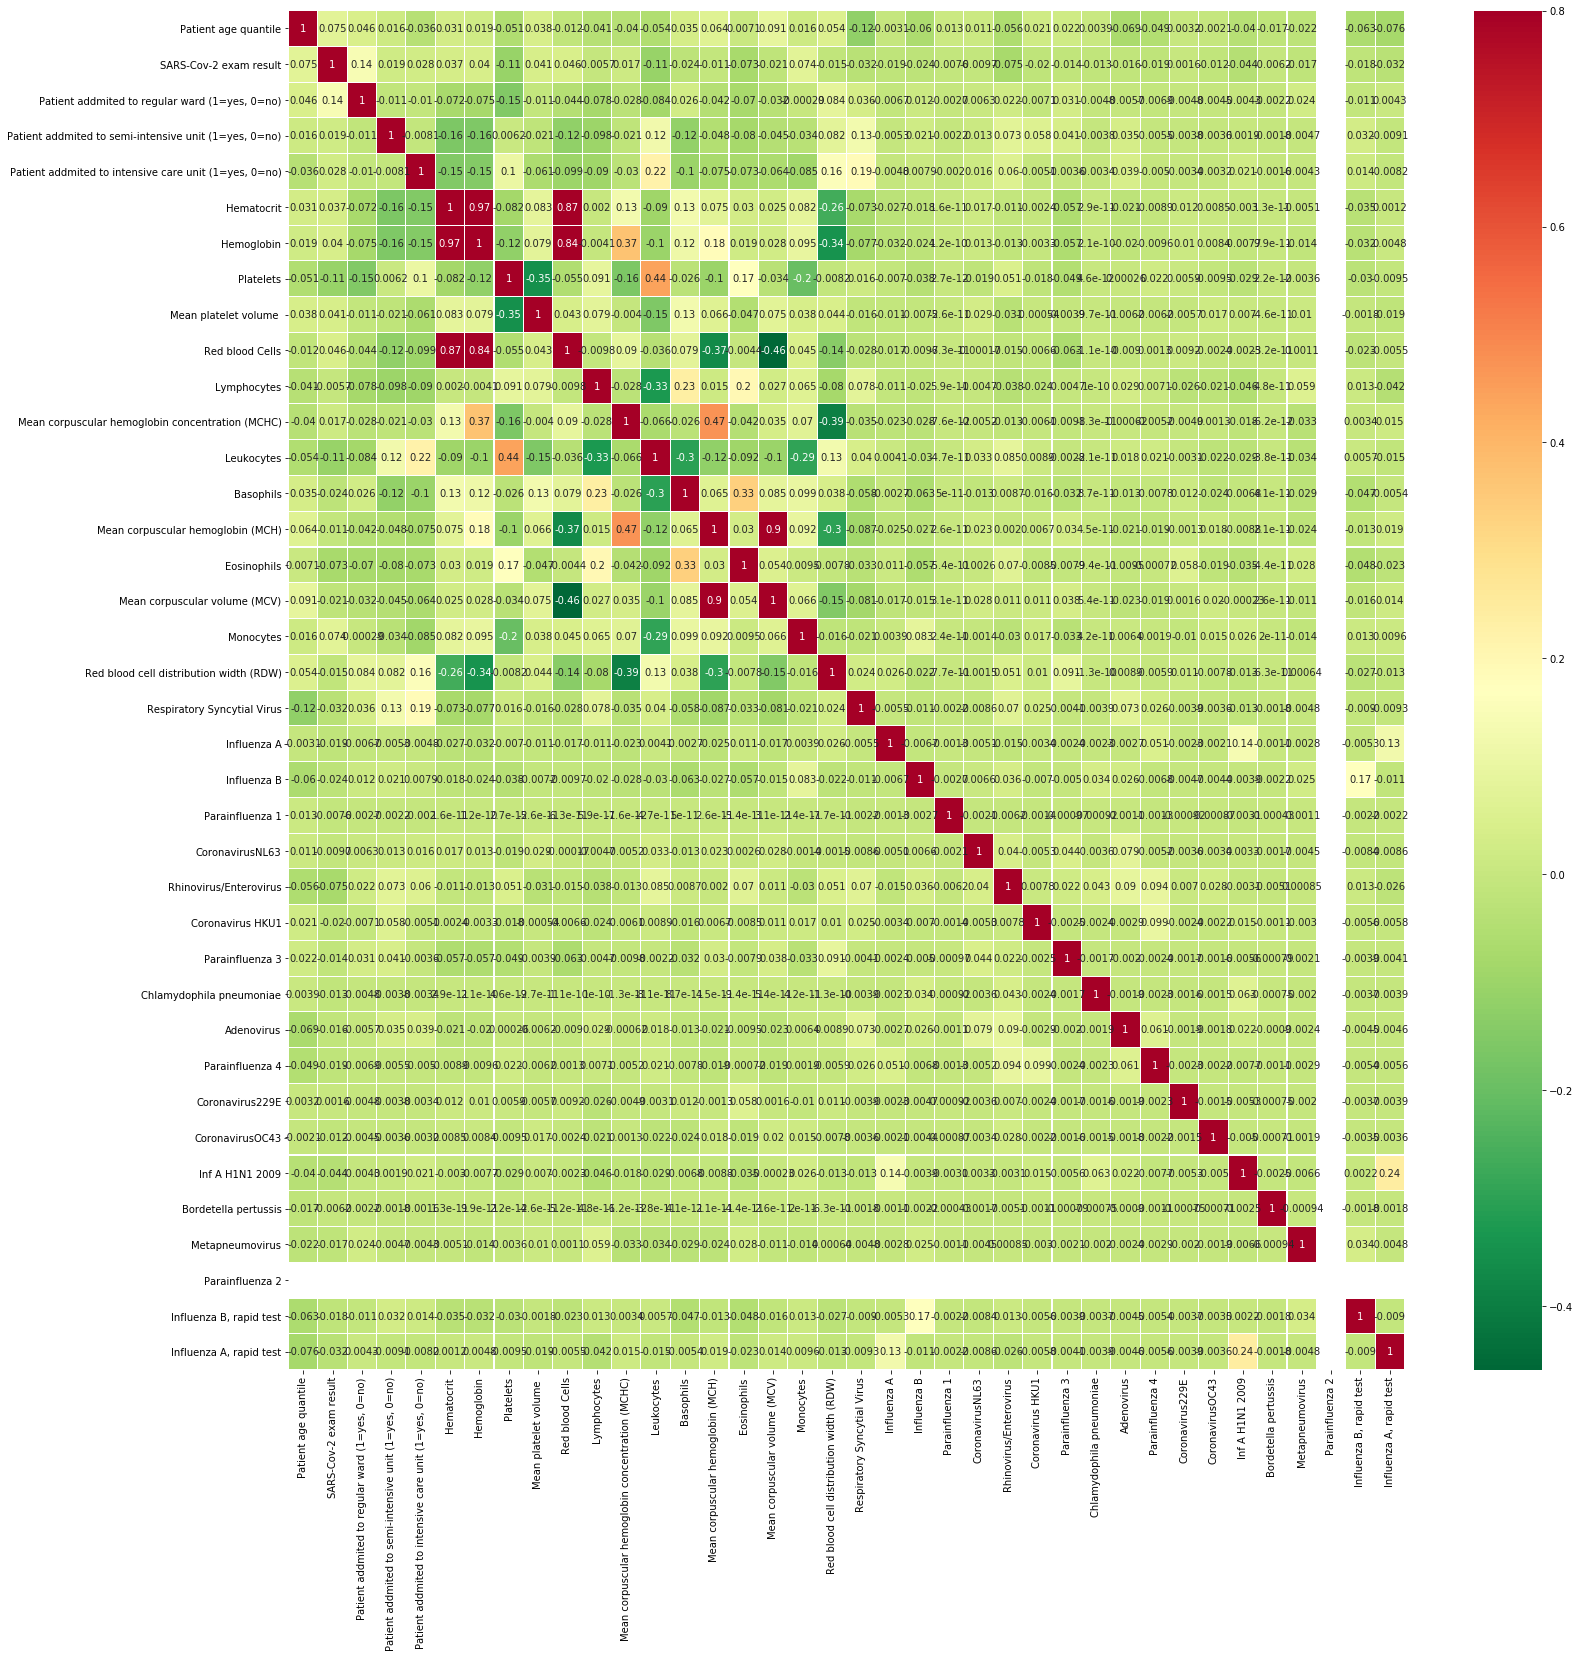

In [16]:
# Correlation Plot
corrmat = df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(25,25))

#Draw the heatmap using seaborn
colormap = plt.cm.RdYlGn_r
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

In [17]:
#check datatypes in orders
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Patient age quantile', 'SARS-Cov-2 exam result',
        'Patient addmited to regular ward (1=yes, 0=no)',
        'Patient addmited to semi-intensive unit (1=yes, 0=no)',
        'Patient addmited to intensive care unit (1=yes, 0=no)'],
       dtype='object'),
 dtype('float64'): Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
        'Red blood Cells', 'Lymphocytes',
        'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
        'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
        'Mean corpuscular volume (MCV)', 'Monocytes',
        'Red blood cell distribution width (RDW)',
        'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
        'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
        'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
        'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
        'Inf A H1N1 2009', 'Bord

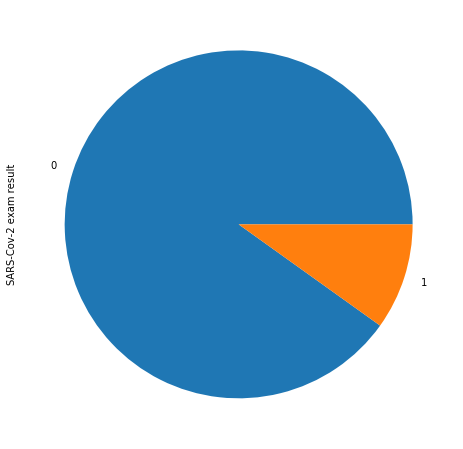

In [18]:
# Check for balance
FIGURE_SIZE = (8,8)
df['SARS-Cov-2 exam result'].value_counts().plot.pie(figsize=FIGURE_SIZE)

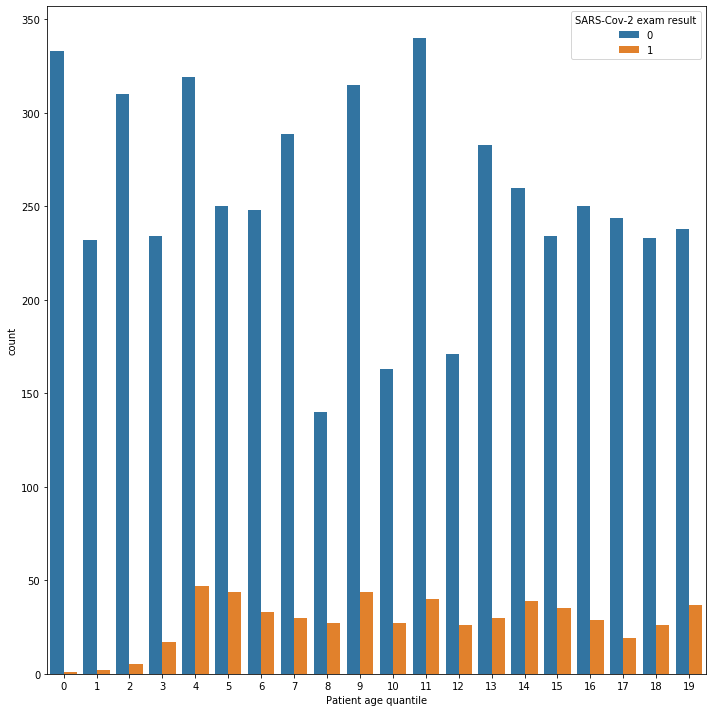

In [19]:
fig = plt.figure(figsize=(10,10))
sns.countplot('Patient age quantile', hue='SARS-Cov-2 exam result', data=df)
plt.tight_layout()
plt.show()

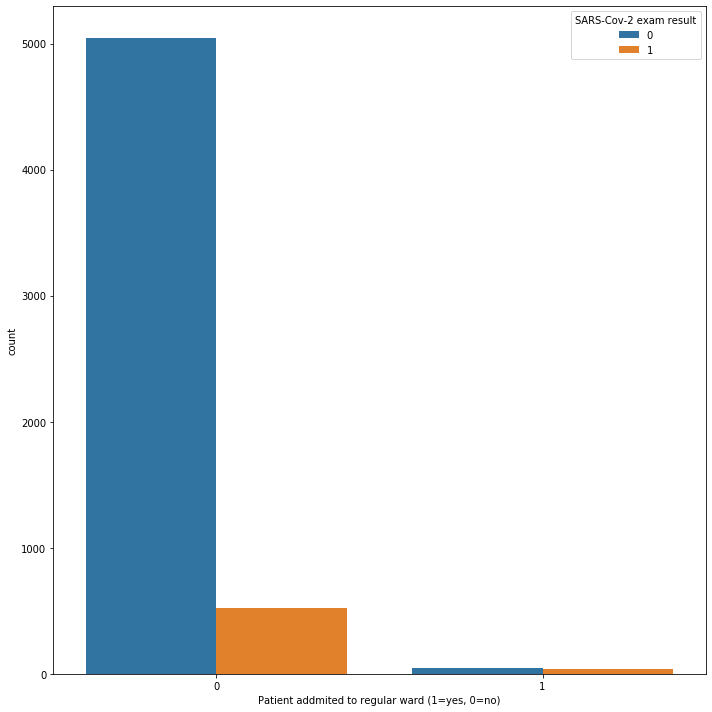

In [20]:
fig = plt.figure(figsize=(10,10))
sns.countplot('Patient addmited to regular ward (1=yes, 0=no)', hue='SARS-Cov-2 exam result', data=df)
plt.tight_layout()
plt.show()

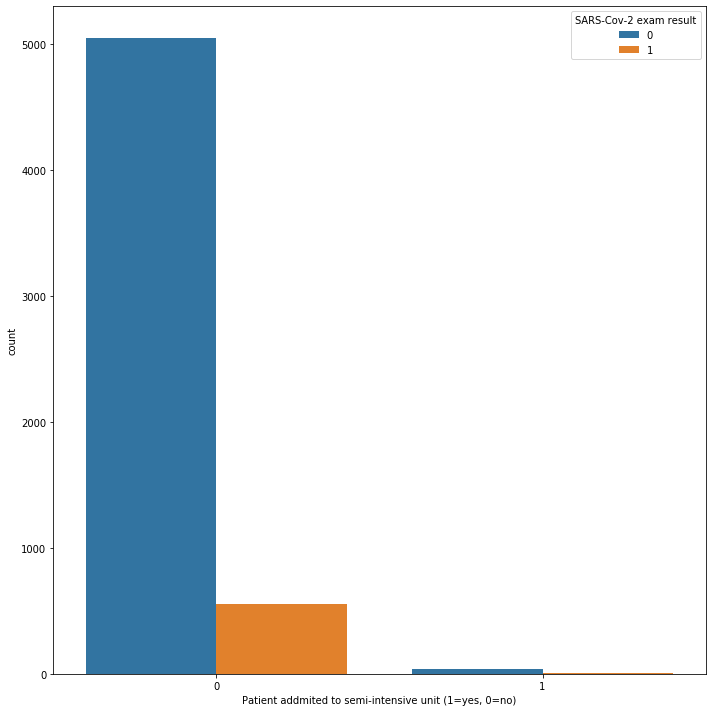

In [21]:
fig = plt.figure(figsize=(10,10))
sns.countplot('Patient addmited to semi-intensive unit (1=yes, 0=no)', hue='SARS-Cov-2 exam result', data=df)
plt.tight_layout()
plt.show()

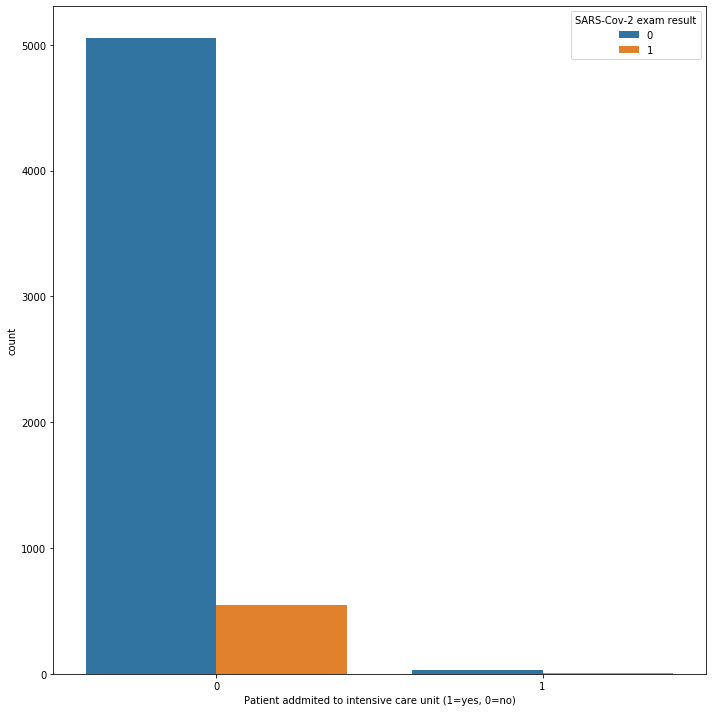

In [22]:
fig = plt.figure(figsize=(10,10))
sns.countplot('Patient addmited to intensive care unit (1=yes, 0=no)', hue='SARS-Cov-2 exam result', data=df)
plt.tight_layout()
plt.show()

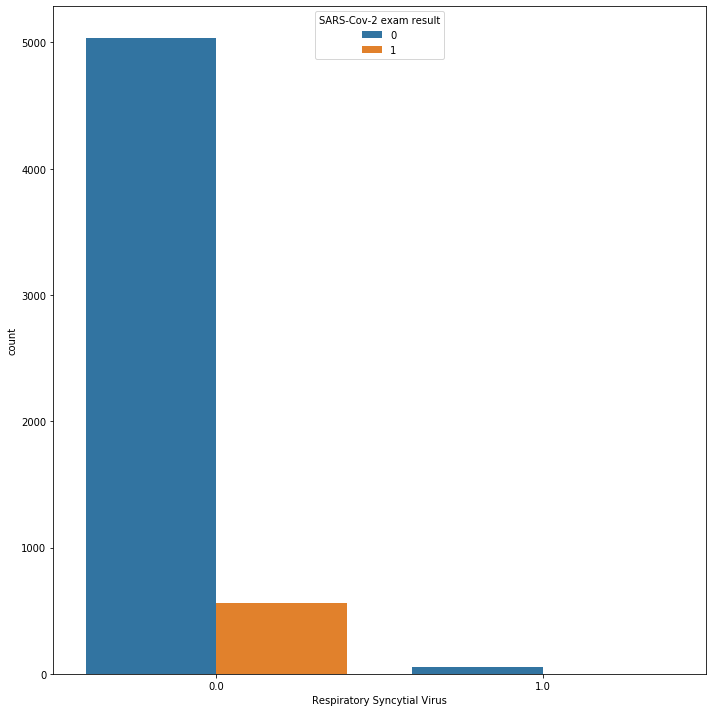

In [23]:
fig = plt.figure(figsize=(10,10))
sns.countplot('Respiratory Syncytial Virus', hue='SARS-Cov-2 exam result', data=df)
plt.tight_layout()
plt.show()

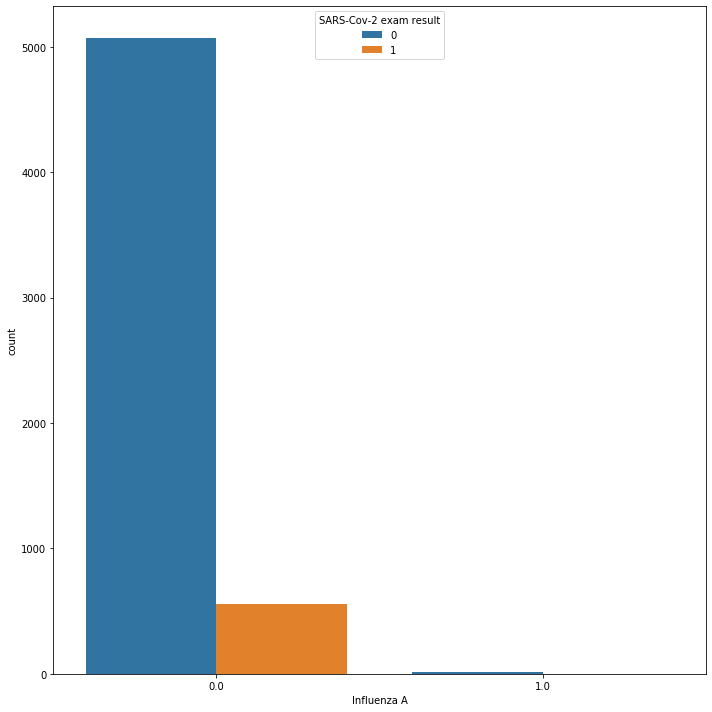

In [24]:
fig = plt.figure(figsize=(10,10))
sns.countplot('Influenza A', hue='SARS-Cov-2 exam result', data=df)
plt.tight_layout()
plt.show()

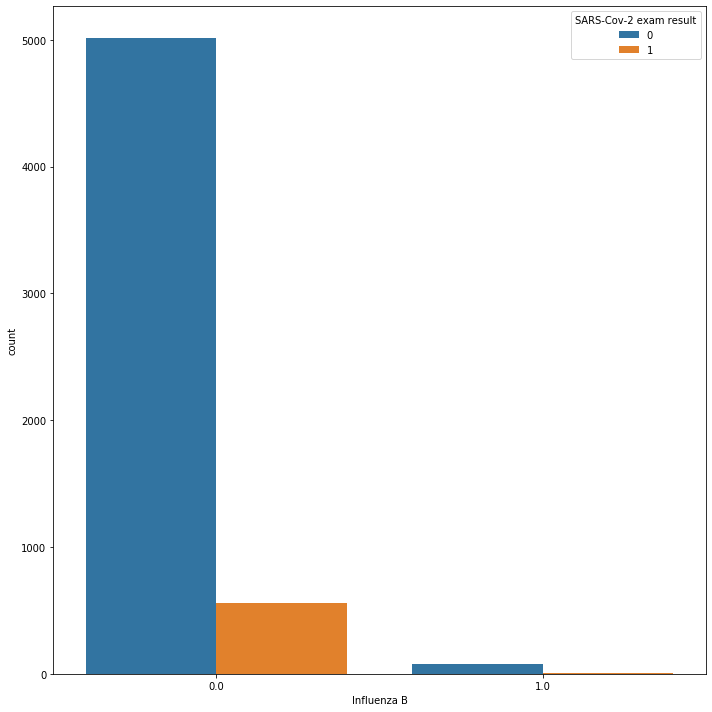

In [25]:
fig = plt.figure(figsize=(10,10))
sns.countplot('Influenza B', hue='SARS-Cov-2 exam result', data=df)
plt.tight_layout()
plt.show()

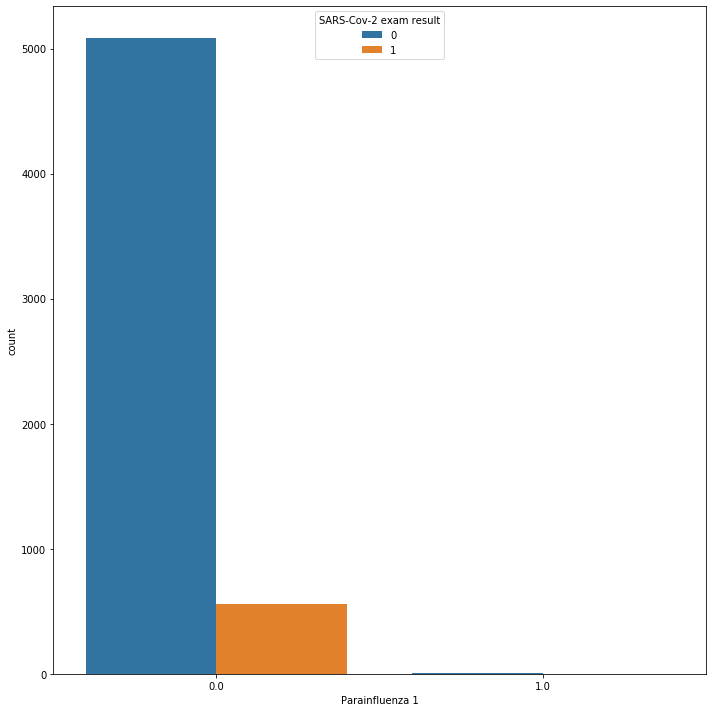

In [26]:
fig = plt.figure(figsize=(10,10))
sns.countplot('Parainfluenza 1', hue='SARS-Cov-2 exam result', data=df)
plt.tight_layout()
plt.show()

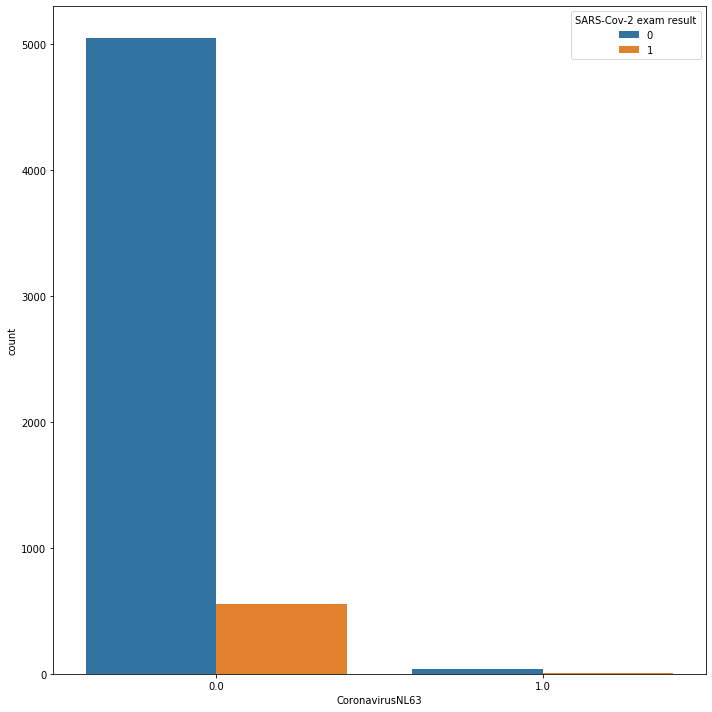

In [27]:
fig = plt.figure(figsize=(10,10))
sns.countplot('CoronavirusNL63', hue='SARS-Cov-2 exam result', data=df)
plt.tight_layout()
plt.show()

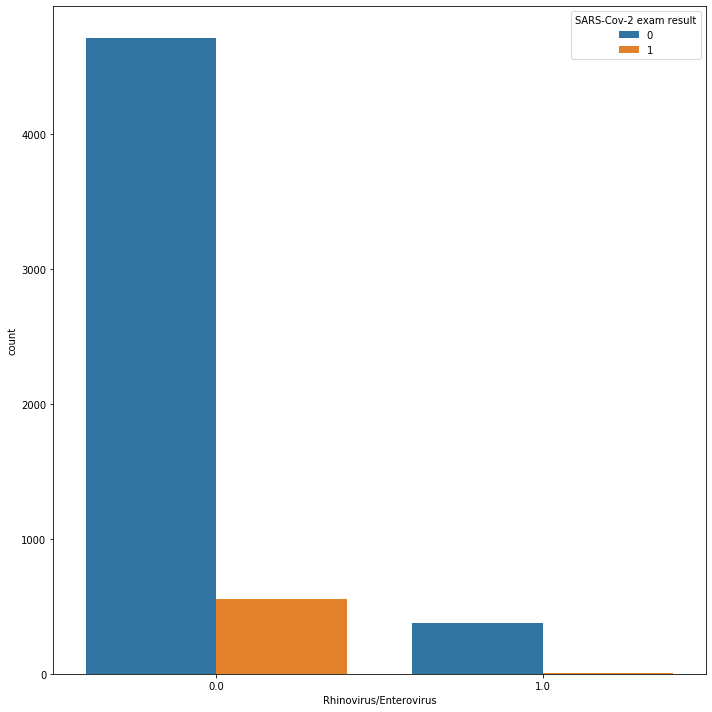

In [28]:
fig = plt.figure(figsize=(10,10))
sns.countplot('Rhinovirus/Enterovirus', hue='SARS-Cov-2 exam result', data=df)
plt.tight_layout()
plt.show()

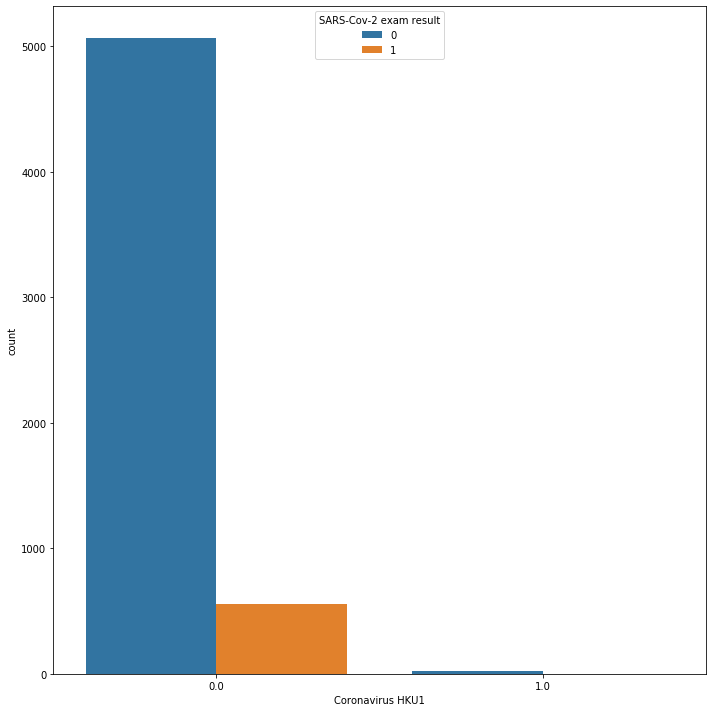

In [29]:
fig = plt.figure(figsize=(10,10))
sns.countplot('Coronavirus HKU1', hue='SARS-Cov-2 exam result', data=df)
plt.tight_layout()
plt.show()

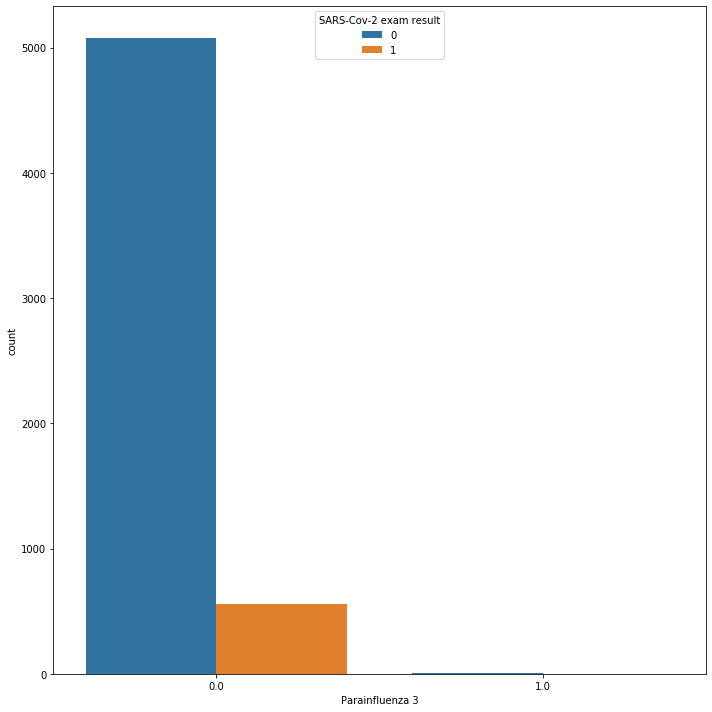

In [30]:
fig = plt.figure(figsize=(10,10))
sns.countplot('Parainfluenza 3', hue='SARS-Cov-2 exam result', data=df)
plt.tight_layout()
plt.show()

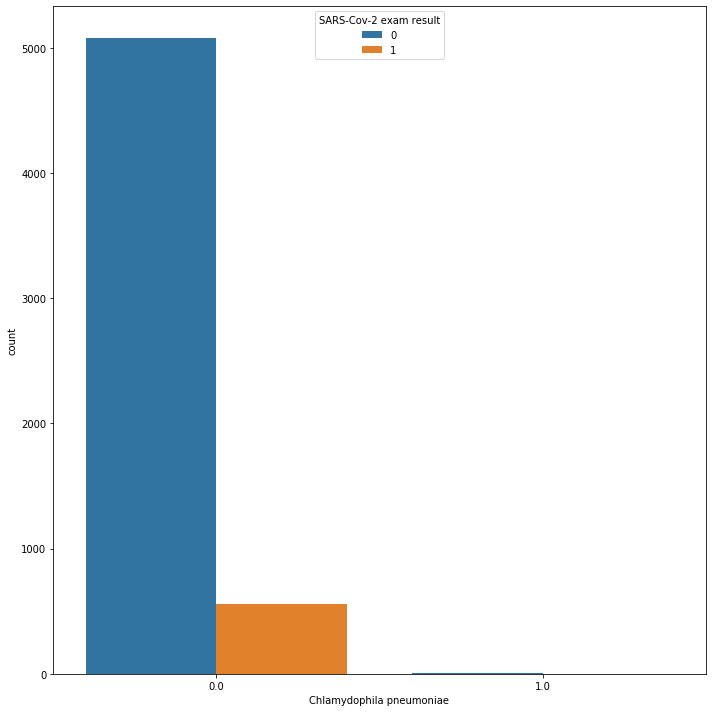

In [31]:
fig = plt.figure(figsize=(10,10))
sns.countplot('Chlamydophila pneumoniae', hue='SARS-Cov-2 exam result', data=df)
plt.tight_layout()
plt.show()

In [32]:
#remove columns without data

#create a list of columns
list_empyt=df[df.sum()[(df.sum() == 0)].index].columns
print(list_empyt)

Index(['Parainfluenza 2'], dtype='object')


In [33]:
#create a dataframe without empty data
df=df.drop(list_empyt,axis=1)
print(df.shape)
print(df.columns)

(5644, 38)
Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Influenza 

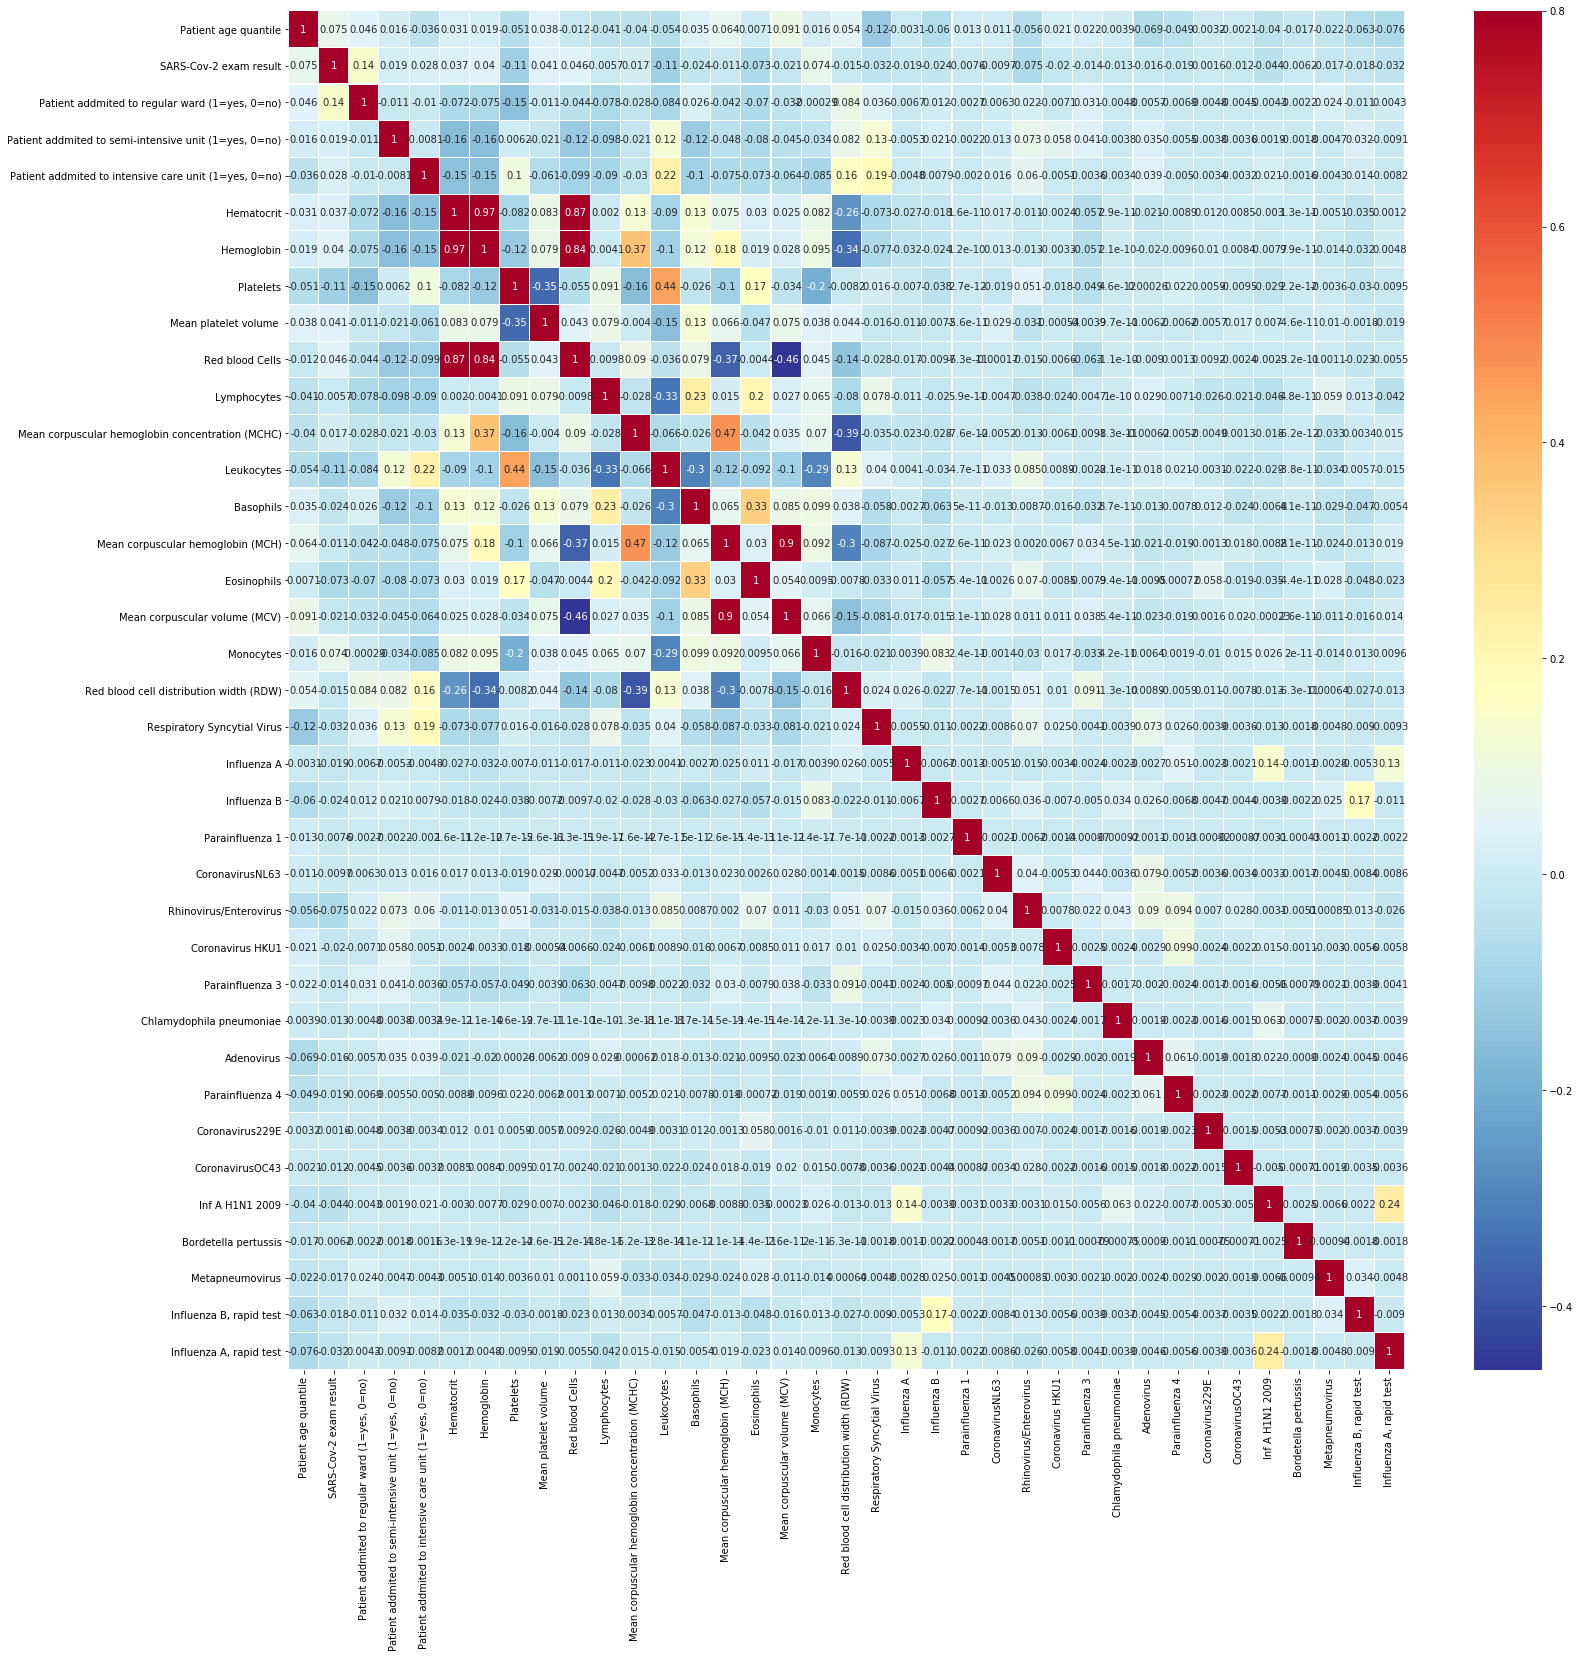

In [34]:
# Correlation Plot
corrmat = df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(25,25))

#Draw the heatmap using seaborn
colormap = plt.cm.RdYlBu_r
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

# Task-1

 Predict confirmed COVID-19 cases among suspected cases. Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

In [35]:
df = df.drop('Patient ID',axis=1)

In [36]:
df.shape

(5644, 37)

In [37]:
X = df.drop('SARS-Cov-2 exam result',axis=1)

In [38]:
y = pd.DataFrame(df['SARS-Cov-2 exam result'],columns=['SARS-Cov-2 exam result'])

In [39]:
X.shape,y.shape

((5644, 36), (5644, 1))

In [40]:
#Prediction - Classification Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [41]:
#Split the data into train and test set for classifcation predictions

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9,stratify=y)
x_train.shape, y_train.shape, x_test.shape

((3950, 36), (3950, 1), (1694, 36))

In [42]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=1000,random_state=0)

In [43]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

############################### KNeighborsClassifier ##################################

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score=  0.8730814639905549


Cross_val_score= 0.9018436578171091


roc_auc_score=  0.5216149233948607


classification_report
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1527
           1       0.18      0.08      0.12       167

    accuracy                           0.87      1694
   macro avg       0.54      0.52      0.52      1694
weighted avg       0.83      0.87      0.85      1694
 

Confusion Matrix
 [[1465   62]
 [ 153   14]] 




############################### SVC ##################################

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', 

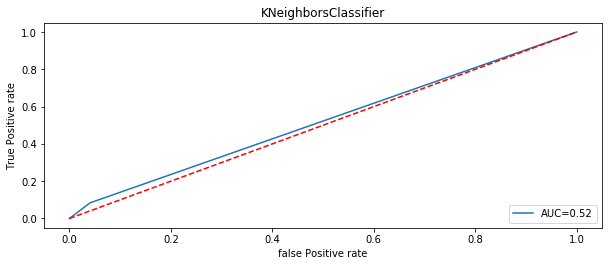

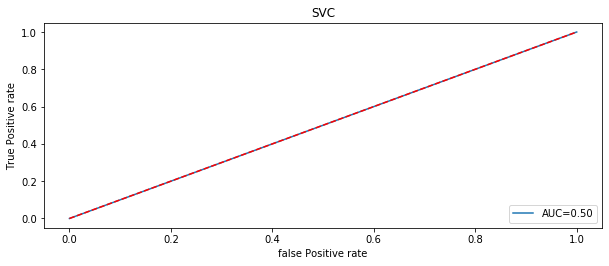

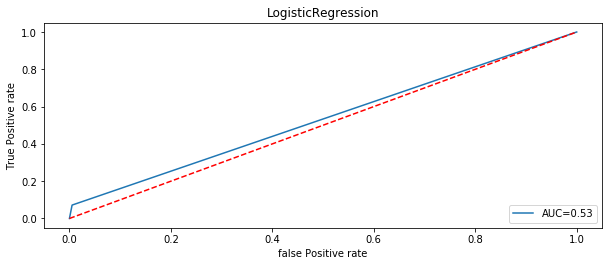

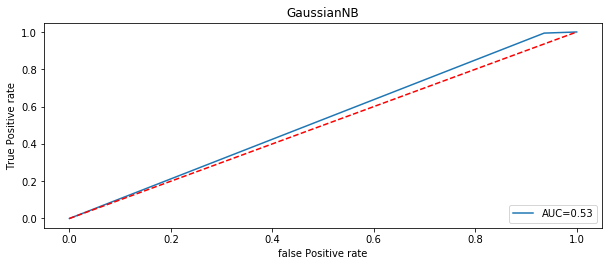

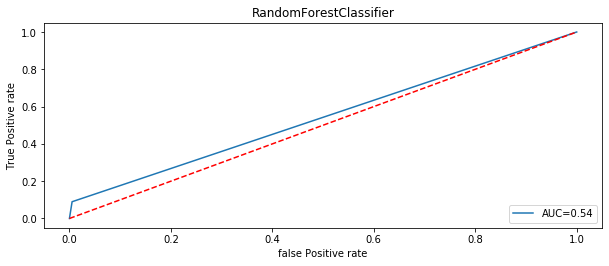

In [45]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('###############################',name,'##################################\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score= ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre),'\n')
    cm=confusion_matrix(y_test,pre)
    print('Confusion Matrix\n',cm,'\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive rate')
    plt.xlabel('false Positive rate')
    print('\n\n')

In [46]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,87.308146,90.184366,52.161492
1,SVC,90.141677,90.113412,50.000000
2,LogisticRegression,90.377804,90.592010,53.330863
3,GaussianNB,15.584416,16.509917,52.909505
4,RandomForestClassifier,90.554900,90.574186,54.229066


In [47]:
from sklearn.externals import joblib
joblib.dump(RFC,'Model_SARS-Cov-2 exam result.obj')

['Model_SARS-Cov-2 exam result.obj']

In [48]:
model1=joblib.load('Model_SARS-Cov-2 exam result.obj')

In [49]:
result1=pd.DataFrame(model1.predict(x_test))

In [50]:
result1.to_csv('SARS-Cov-2 exam result_prdictresults.csv')

# Task-2

 Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases. Based on the results of laboratory tests commonly collected among confirmed COVID-19 cases during a visit to the emergency room, would it be possible to predict which patients will need to be admitted to a general ward, semi-intensive unit or intensive care unit?

In [51]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test"
0,13,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df.shape

(5644, 37)

In [53]:
covid_positive = df[df['SARS-Cov-2 exam result'] == 1]
num_positive = len(covid_positive)
print(f'In the dataset, there are {num_positive} entries of patients infected with SARS-CoV-2')
print(f'This number corresponds to around {round((num_positive / len(df)) * 100)}% of the dataset')

In the dataset, there are 558 entries of patients infected with SARS-CoV-2
This number corresponds to around 10% of the dataset


In [54]:
regular_ward = df[df['Patient addmited to regular ward (1=yes, 0=no)'] == 1]
semi_intensive = df[df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1]
icu = df[df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1]

print("From all patients, regardless of Covid-19 test result: ")
print(f'{len(regular_ward)} patients were admitted in a regular ward.')
print(f'{len(semi_intensive)} patients were admitted in a semi intensive care unit.')
print(f'{len(icu)} patients were admitted in an intensive care unit.')

From all patients, regardless of Covid-19 test result: 
79 patients were admitted in a regular ward.
50 patients were admitted in a semi intensive care unit.
41 patients were admitted in an intensive care unit.


In [55]:
pos_regular_ward = covid_positive[covid_positive['Patient addmited to regular ward (1=yes, 0=no)'] == 1]
pos_semi_intensive = covid_positive[covid_positive['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1]
pos_icu = covid_positive[covid_positive['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1]

print("From Covid-19 patients: ")
print(f'{len(pos_regular_ward)} patients were admitted in a regular ward.')
print(f'{len(pos_semi_intensive)} patients were admitted in a semi intensive care unit.')
print(f'{len(pos_icu)} patients were admitted in an intensive care unit.')

From Covid-19 patients: 
36 patients were admitted in a regular ward.
8 patients were admitted in a semi intensive care unit.
8 patients were admitted in an intensive care unit.


In [56]:
def multi_target(row):
    check = 0
    check += 1 if (row['Patient addmited to regular ward (1=yes, 0=no)'] == 1) else 0
    check += 2 if (row['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1) else 0
    check += 3 if (row['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1) else 0
    row['target'] = check
    return row

covid_positive = covid_positive.apply(multi_target, axis=1)
covid_positive.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",target
67,7.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,16.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
513,10.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568,2.0,1.0,0.0,0.0,0.0,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,-0.452899,-0.420197,1.303529,-1.442245,-0.498393,-1.396114,1.933339,0.967144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
676,15.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
covid_positive.drop(['Patient addmited to regular ward (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1, inplace=True)

In [58]:
covid_positive.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",target
67,7.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,16.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
513,10.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568,2.0,1.0,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,-0.452899,-0.420197,1.303529,-1.442245,-0.498393,-1.396114,1.933339,0.967144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
676,15.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


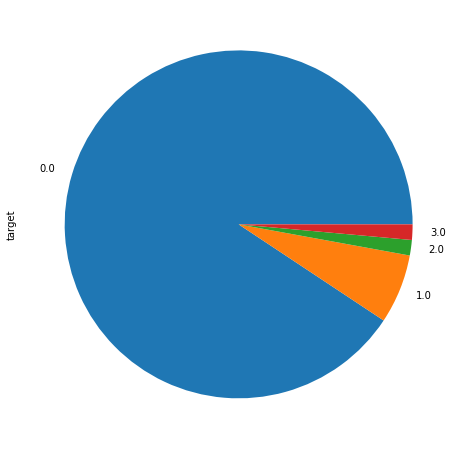

In [59]:
# Check for balance
FIGURE_SIZE = (8,8)
covid_positive['target'].value_counts().plot.pie(figsize=FIGURE_SIZE)

In [60]:
X = covid_positive.drop('target',axis=1)

In [61]:
y = pd.DataFrame(covid_positive['target'],columns=['target'])

In [62]:
#Prediction - Classification Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [63]:
#Split the data into train and test set for classifcation predictions

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9,stratify=y)
x_train.shape, y_train.shape, x_test.shape

((390, 34), (390, 1), (168, 34))

In [64]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=1000,random_state=0)

In [65]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))

In [66]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [67]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('###############################',name,'##################################\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre),'\n')
    cm=confusion_matrix(y_test,pre)
    print('Confusion Matrix\n',cm,'\n')
   

############################### KNeighborsClassifier ##################################

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score=  0.9226190476190477


Cross_val_score= 0.9175974025974026


classification_report
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       152
         1.0       1.00      0.27      0.43        11
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         2

    accuracy                           0.92       168
   macro avg       0.48      0.32      0.35       168
weighted avg       0.90      0.92      0.90       168
 

Confusion Matrix
 [[152   0   0   0]
 [  8   3   0   0]
 [  3   0   0   0]
 [  2   0   0   0]] 

############################### SVC ##################################

SVC(C=1.0, break_

In [68]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,92.261905,91.759740
1,SVC,90.476190,90.503247
2,LogisticRegression,91.666667,93.188312
3,GaussianNB,7.738095,6.448052
4,RandomForestClassifier,91.071429,92.477273


In [69]:
from sklearn.externals import joblib
joblib.dump(KNN,'model_Patient_addmited_to_which_ward.obj')

['model_Patient_addmited_to_which_ward.obj']

In [70]:
model2=joblib.load('model_Patient_addmited_to_which_ward.obj')

In [71]:
result2=pd.DataFrame(model2.predict(x_test))

In [72]:
result2.to_csv('Patient_addmited_to_which_ward_prdictresults.csv')